# INGEST

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# GENERATE DATA

In [2]:
graph={}
graph['NYC'] = {}
graph['NYC']['DC'] = 2
graph['NYC']['Indianapolis'] = 11
graph['NYC']['Pittsburg'] = 7

graph['DC'] = {}
graph['DC']['Atlanta'] = 2
graph['Indianapolis'] = {}
graph['Indianapolis']['Kansas City'] = 8
graph['Pittsburg'] = {}
graph['Pittsburg']['Cindinnati'] = 6

graph['Atlanta'] = {}
graph['Atlanta']['New Orleans'] = 2
graph['Kansas City'] = {}
graph['Kansas City']['Denvor'] = 7
graph['Cindinnati'] = {}
graph['Cindinnati']['St Louis'] = 8

graph['New Orleans'] = {}
graph['New Orleans']['Dallas'] = 2
graph['Denvor'] = {}
graph['Denvor']['Salt Lake City'] = 6
graph['St Louis'] = {}
graph['St Louis']['Okalahoma City'] = 7

graph['Dallas'] = {}
graph['Dallas']['Albuquerque'] = 2
graph['Salt Lake City'] = {}
graph['Salt Lake City']['Las Vegas'] = 9
graph['Okalahoma City'] = {}
graph['Okalahoma City']['Albuquerque'] = 9

graph['Albuquerque'] = {}
graph['Albuquerque']['Phoenix'] = 2

graph['Phoenix'] = {}
graph['Phoenix']['San Diego'] = 5
graph['Phoenix']['Las Vegas'] = 2

graph['Las Vegas'] = {}
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5
graph['San Diego'] = {}
graph['San Diego']['Los Angeles'] = 2

graph['Los Angeles']={}

In [3]:
infinity = float('inf')
costs = {}
costs['DC'] = 2
costs['Indianapolis'] = 11
costs['Pittsburg'] = 7

costs['Atlanta'] = infinity
costs['Kansas City'] = infinity
costs['Cindinnati'] = infinity
costs['New Orleans'] = infinity
costs['Denvor'] =  infinity
costs['St Louis'] = infinity
costs['Dallas'] =  infinity
costs['Salt Lake City'] = infinity
costs['Okalahoma City'] =  infinity
costs['Albuquerque'] =  infinity
costs['Phoenix'] = infinity
costs['Las Vegas'] = infinity
costs['San Diego'] = infinity
costs['Los Angeles'] = infinity

parents = {}
parents['DC'] = 'NYC'
parents['Indianapolis'] = 'NYC'
parents['Pittsburg'] = 'NYC'
parents['Los Angeles'] = None

processed = []
processed2 = []

# DEFINE FUNCTIONS

In [4]:
# Define Breadth-first Search function. 
def BFS(graph,start,goal):
    explored = []
    queue = [[start]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                if neighbor == goal:
                    return new_path
            explored.append(node)
    return False

total_runtime=[]
start_time = time.perf_counter()  
route = BFS(graph,'NYC','Los Angeles')

def total_cost(lst):
    cost = 0
    for i in range(len(lst)-1):
        cost += graph[lst[i]][lst[i+1]]
    return cost

total_time1 = total_cost(route)

print(f'The quickest way to get to LA from NYC is below: \n{route}')
print(f'\nThe time of the quickest way to get to LA from NYC is {total_time1} hours.')

end_time = time.perf_counter()
runtime = (end_time - start_time) * 1000
total_runtime.append(runtime)
total_stops=[]
total_stops.append(len(route))

The quickest way to get to LA from NYC is below: 
['NYC', 'Indianapolis', 'Kansas City', 'Denvor', 'Salt Lake City', 'Las Vegas', 'Los Angeles']

The time of the quickest way to get to LA from NYC is 46 hours.


In [5]:
# Define Dijkstra's Algorithm Function. 
def find_lowest_cost_node(costs):
    lowest_cost = float('inf')
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

start_time = time.perf_counter()  
node = find_lowest_cost_node(costs)

while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs) 
total_time2 = costs['Los Angeles']

path = []
current = 'Los Angeles'

while current != 'NYC':
    path.append(current)
    current = parents[current]
path.append('NYC')
path.reverse()
print(f'The most optimal route to get to LA from NYC is below: \n{path}')
print(f'\nThe time of the most optimal route to get to LA from NYC is {total_time2} hours.')

end_time = time.perf_counter()
runtime = (end_time - start_time) * 1000
total_runtime.append(runtime)
total_stops.append(len(path))

The most optimal route to get to LA from NYC is below: 
['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas', 'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']

The time of the most optimal route to get to LA from NYC is 18 hours.


# TABLE AND GRAPHS

In [6]:
total_time = (total_time1, total_time2)
total_time
searching_type = ['BFS', "Dijkstra's"]
data = np.array([searching_type,total_time, total_stops, total_runtime]).T
df = pd.DataFrame(data)
df.columns = ['Searching Type', 'Total Traveling Time (hrs)', 'Total Stops', 'Performance Time (ms)']
display(df)

,Searching Type,Total Traveling Time (hrs),Total Stops,Performance Time (ms)
0,BFS,46,7,0.2439000000000746
1,Dijkstra's,18,10,0.5306000000000477


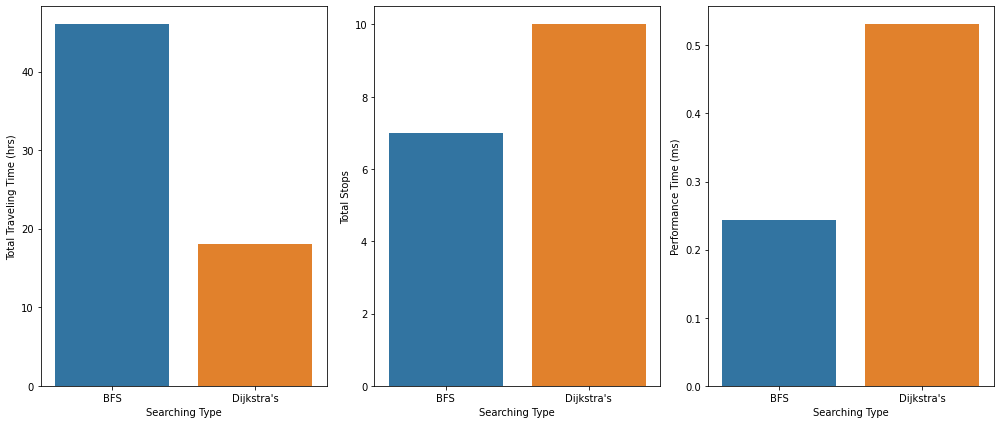

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
cat = ['Total Traveling Time (hrs)', 'Total Stops', 'Performance Time (ms)']
for i, subplots in zip(cat, ax.flatten()):
    ax = sns.barplot(x='Searching Type', y=i, data=df, ax=subplots)
fig.tight_layout()

# CONCLUSION

Breadth_first search (BFS) and Dijkstra's algorithm are used in this practice to see the different paths in an directed weighted graph. 

Below explains how each searching algorithms work: 

- BFS uses queue data structure to find the quickest path in the graph traversal. BFS is a traversing algorithm with a selected starting node and traverse the graph layerwise thus exploring the neighbor nodes. Note that it must visit all current layer nodes before moving to the next layer. To avoid processing of the same node again, we use a boolean array recording all the processed nodes. To make the this process easy, we use a queue to store the nodes and mark it as processed until all its neighbors are checked. Note that the queue follows the rule of first in first out (FIFO). Thus, the neighbors of the nodes will be visited in the order in which they are inserted in the node.


- Dijkstra's algorithm starts at a chosen node and it analyzes the graph to find the most optimized path betwen that node and all other nodes in the graph. The algorithm tracks the currently known most shortest weighted distance from each node to the starting node, and updates the values if a shorter path is found. Once the shortest path is found between the starting node and another node, that node is marked as "explorer" and added to the path. This process continues until all the nodes in the graph have been added to the path.

Below explains how the runtime and big O notication of each searching algorithms: 

- BFS follows a big O notation of O(V+E), where V is the number of vertices(nodes) and E is the number of edges. It takes O(V) time to add nodes to the queue with O(1) for each node/vertex, and follows O(1) for each edge (connection).

- Dijkstra's algorithm follows a big O notation of O((V+E)* log(V)), where V is the number of vertices(nodes) and E is the number of edges.

In our exercise, V=18 and E=21. Thus, the Big O notation for BFS is O(39), while it is O(49) for Dijkstra's, which match the results from our graph(3) that BFS is faster than Dijkstra's. The resulted stopping cities from BFS is less than Dijstra's (7 vs. 10). Thus, BFS is ideal is we would like a faster algorithm with less stopping points. However, since the traveling hours from Dijkstra's is much less than from BFS (18 vs. 46), we can consider Dijkstra's algorithm if we would like the most optimized path with the least hours.  